In [1]:
import pandas as pd, numpy as np

In [2]:
# Intializes data
data = pd.read_csv("nalcs.csv").drop("Unnamed: 0", 1)
stop = open("stop-word-list.txt").read().splitlines()
data = data[data.message.notnull()]

In [5]:
import datetime

# Removes the punctuations from the data set
punctuation_chars = ".,!?:;\"'-~|[]()/\\\n"

messages = data.message.str.lower()
def remove_punctuations(s):
    s = ''.join([i for i in s if i not in frozenset(punctuation_chars)])
    return s

data['minute'] = [datetime.datetime.fromtimestamp(x/1000).strftime('%m/%d %H:%M') for x in data.timestamp]

In [6]:
# Groups each message with the corresponding date
g = data.groupby(['minute'])
messages = g.message.aggregate(' '.join)
messages = messages.str.lower()
messages = messages.apply(remove_punctuations).str.split()
messages = messages.apply(lambda x: 
        [w for w in x if w.isalpha() and w not in stop])
messages

minute
04/23 14:01    [kappa, pogchamp, notification, squadd, yes, a...
04/23 14:02    [gonna, close, tsm, tsm, ay, pogchamp, llololo...
04/23 14:03    [na, said, eu, starting, wether, youre, tsm, z...
04/23 14:04    [tsm, sneakyweeb, sneakyweeb, sneakyweeb, snea...
04/23 14:05    [tsm, pogchamp, wtf, doing, mitch, lmao, pogch...
04/23 14:06    [id, watch, na, twitch, chat, eu, lcs, failfis...
04/23 14:07    [scripted, guys, wanna, bet, palce, viewers, e...
04/23 14:08    [lul, sneakyhey, sneakypride, sneakyclap, snea...
04/23 14:09    [lul, eu, realise, vs, tsm, real, lcs, lul, so...
04/23 14:10    [splyce, beat, current, best, na, teams, voten...
04/23 14:11    [press, think, gonna, win, rooaww, rooaww, roo...
04/23 14:12    [actually, starting, matter, holy, pogchamp, y...
04/23 14:13    [did, better, eu, elegiggle, eu, lul, tsm, lul...
04/23 14:14    [skt, year, residentsleeper, skt, skin, reside...
04/23 14:15    [vote, golden, kappa, check, hauntzer, vs, imp...
04/23 14:16    [ke

In [7]:
# Computes TF matrix, reduces the matrix by removing all NaNs; computes IDF vector and TD-IDF matrix
TF = messages.apply(lambda x: pd.Series(x).value_counts())
TF = TF.loc[:,TF.sum() > 2]
IDF = np.log10( float(len(TF))/TF.count() )
TFIDF = TF*IDF

vocab = TFIDF.columns
vocab

Index(['aa', 'aatrox', 'abella', 'abilities', 'ablazew', 'able', 'absolute',
       'absolutely', 'abuse', 'abuser',
       ...
       'zzzz', 'ß', 'ç', 'é', 'özbek', 'üllar', 'češi', 'つ', 'ｃｌｏｗｎ', 'ｇｇ'],
      dtype='object', length=5318)

In [8]:
# Prints results:
print(TFIDF.shape)
    
print(TF.sum().sort_values(ascending=False)[:10])
print(TFIDF.sum().sort_values(ascending=False)[:10])

print((TFIDF.max(1).idxmax(), TFIDF.max(0).idxmax()), TFIDF.max().max())

(390, 5318)
lul           22183.0
pogchamp      18848.0
energy        16917.0
giveplz       16800.0
takenrg       14956.0
tsm           14596.0
na             4588.0
hahaa          3698.0
gg             3591.0
biblethump     3316.0
dtype: float64
giveplz     2874.628823
takenrg     2608.686835
energy      2253.051910
sourpls     1394.373715
sabaping    1217.529275
ttours      1211.562284
funrun       839.897698
gg           744.232025
robbed       694.610742
smote        646.595697
dtype: float64
('04/23 17:13', 'tm') 344.572766426


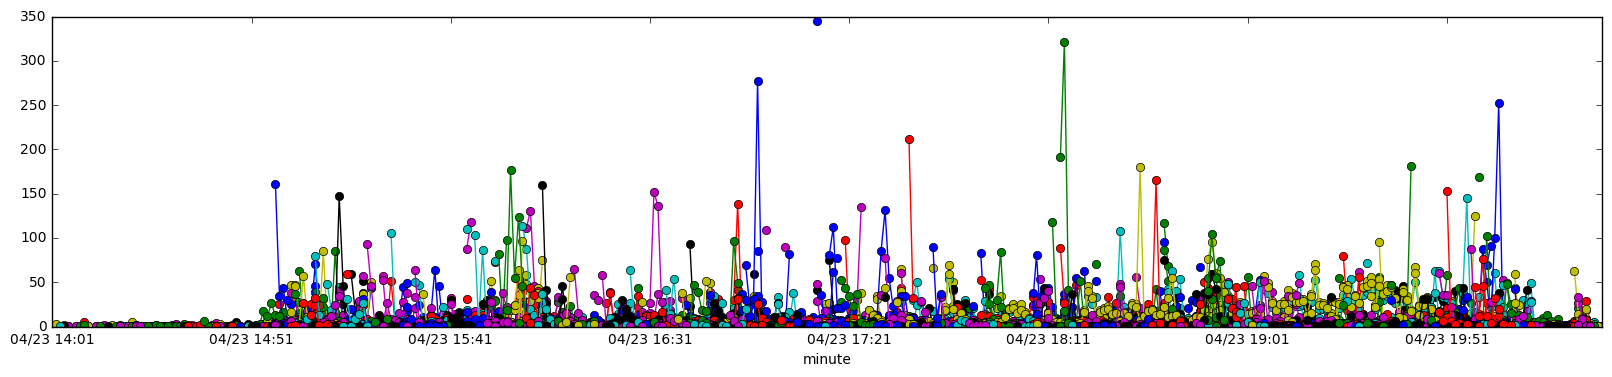

In [9]:
%matplotlib inline

# Graphing the peak events
TFIDF.loc[:,TFIDF.max() > 25].plot(figsize=(20,4),legend=False, marker='o')

In [10]:
# Important words during the stream
TFIDF.idxmax(axis=1)

minute
04/23 14:01             eyyy
04/23 14:02          sneakyw
04/23 14:03             skin
04/23 14:04        weedfaded
04/23 14:05            chest
04/23 14:06          sneakye
04/23 14:07               rs
04/23 14:08       sneakyjack
04/23 14:09          votenay
04/23 14:10          expired
04/23 14:11           rooaww
04/23 14:12           starts
04/23 14:13          tatglam
04/23 14:14       kimihobbes
04/23 14:15            watch
04/23 14:16          rekless
04/23 14:17          mascots
04/23 14:18           dyrusf
04/23 14:19             gift
04/23 14:20               jp
04/23 14:21           dududu
04/23 14:22        buttholes
04/23 14:23          matchup
04/23 14:24        sneakywut
04/23 14:25             logo
04/23 14:26       supporting
04/23 14:27            using
04/23 14:28              haa
04/23 14:29       supporting
04/23 14:30         pobchamp
                   ...      
04/23 20:01           mvgame
04/23 20:02         biodaddy
04/23 20:03           funrun
04/23 2

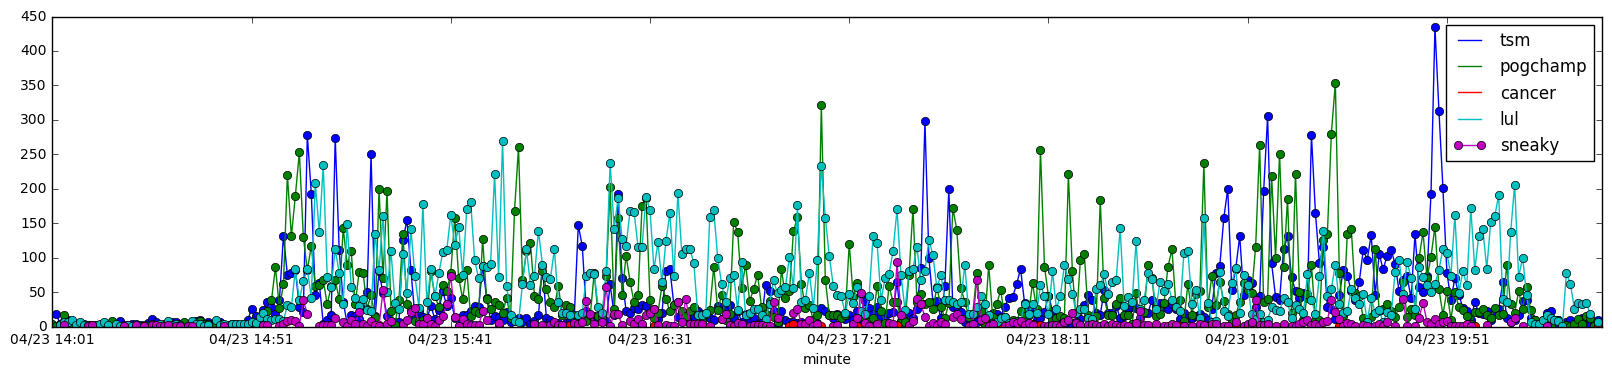

In [12]:
TF.tsm.plot(figsize=(20,4), legend=True, marker='o')
TF.pogchamp.plot(figsize=(20,4), legend=True, marker='o')
TF.cancer.plot(figsize=(20,4), legend=True, marker='o')
TF.lul.plot(figsize=(20,4), legend=True, marker='o')
TF.sneaky.plot(figsize=(20,4), legend=True, marker='o')

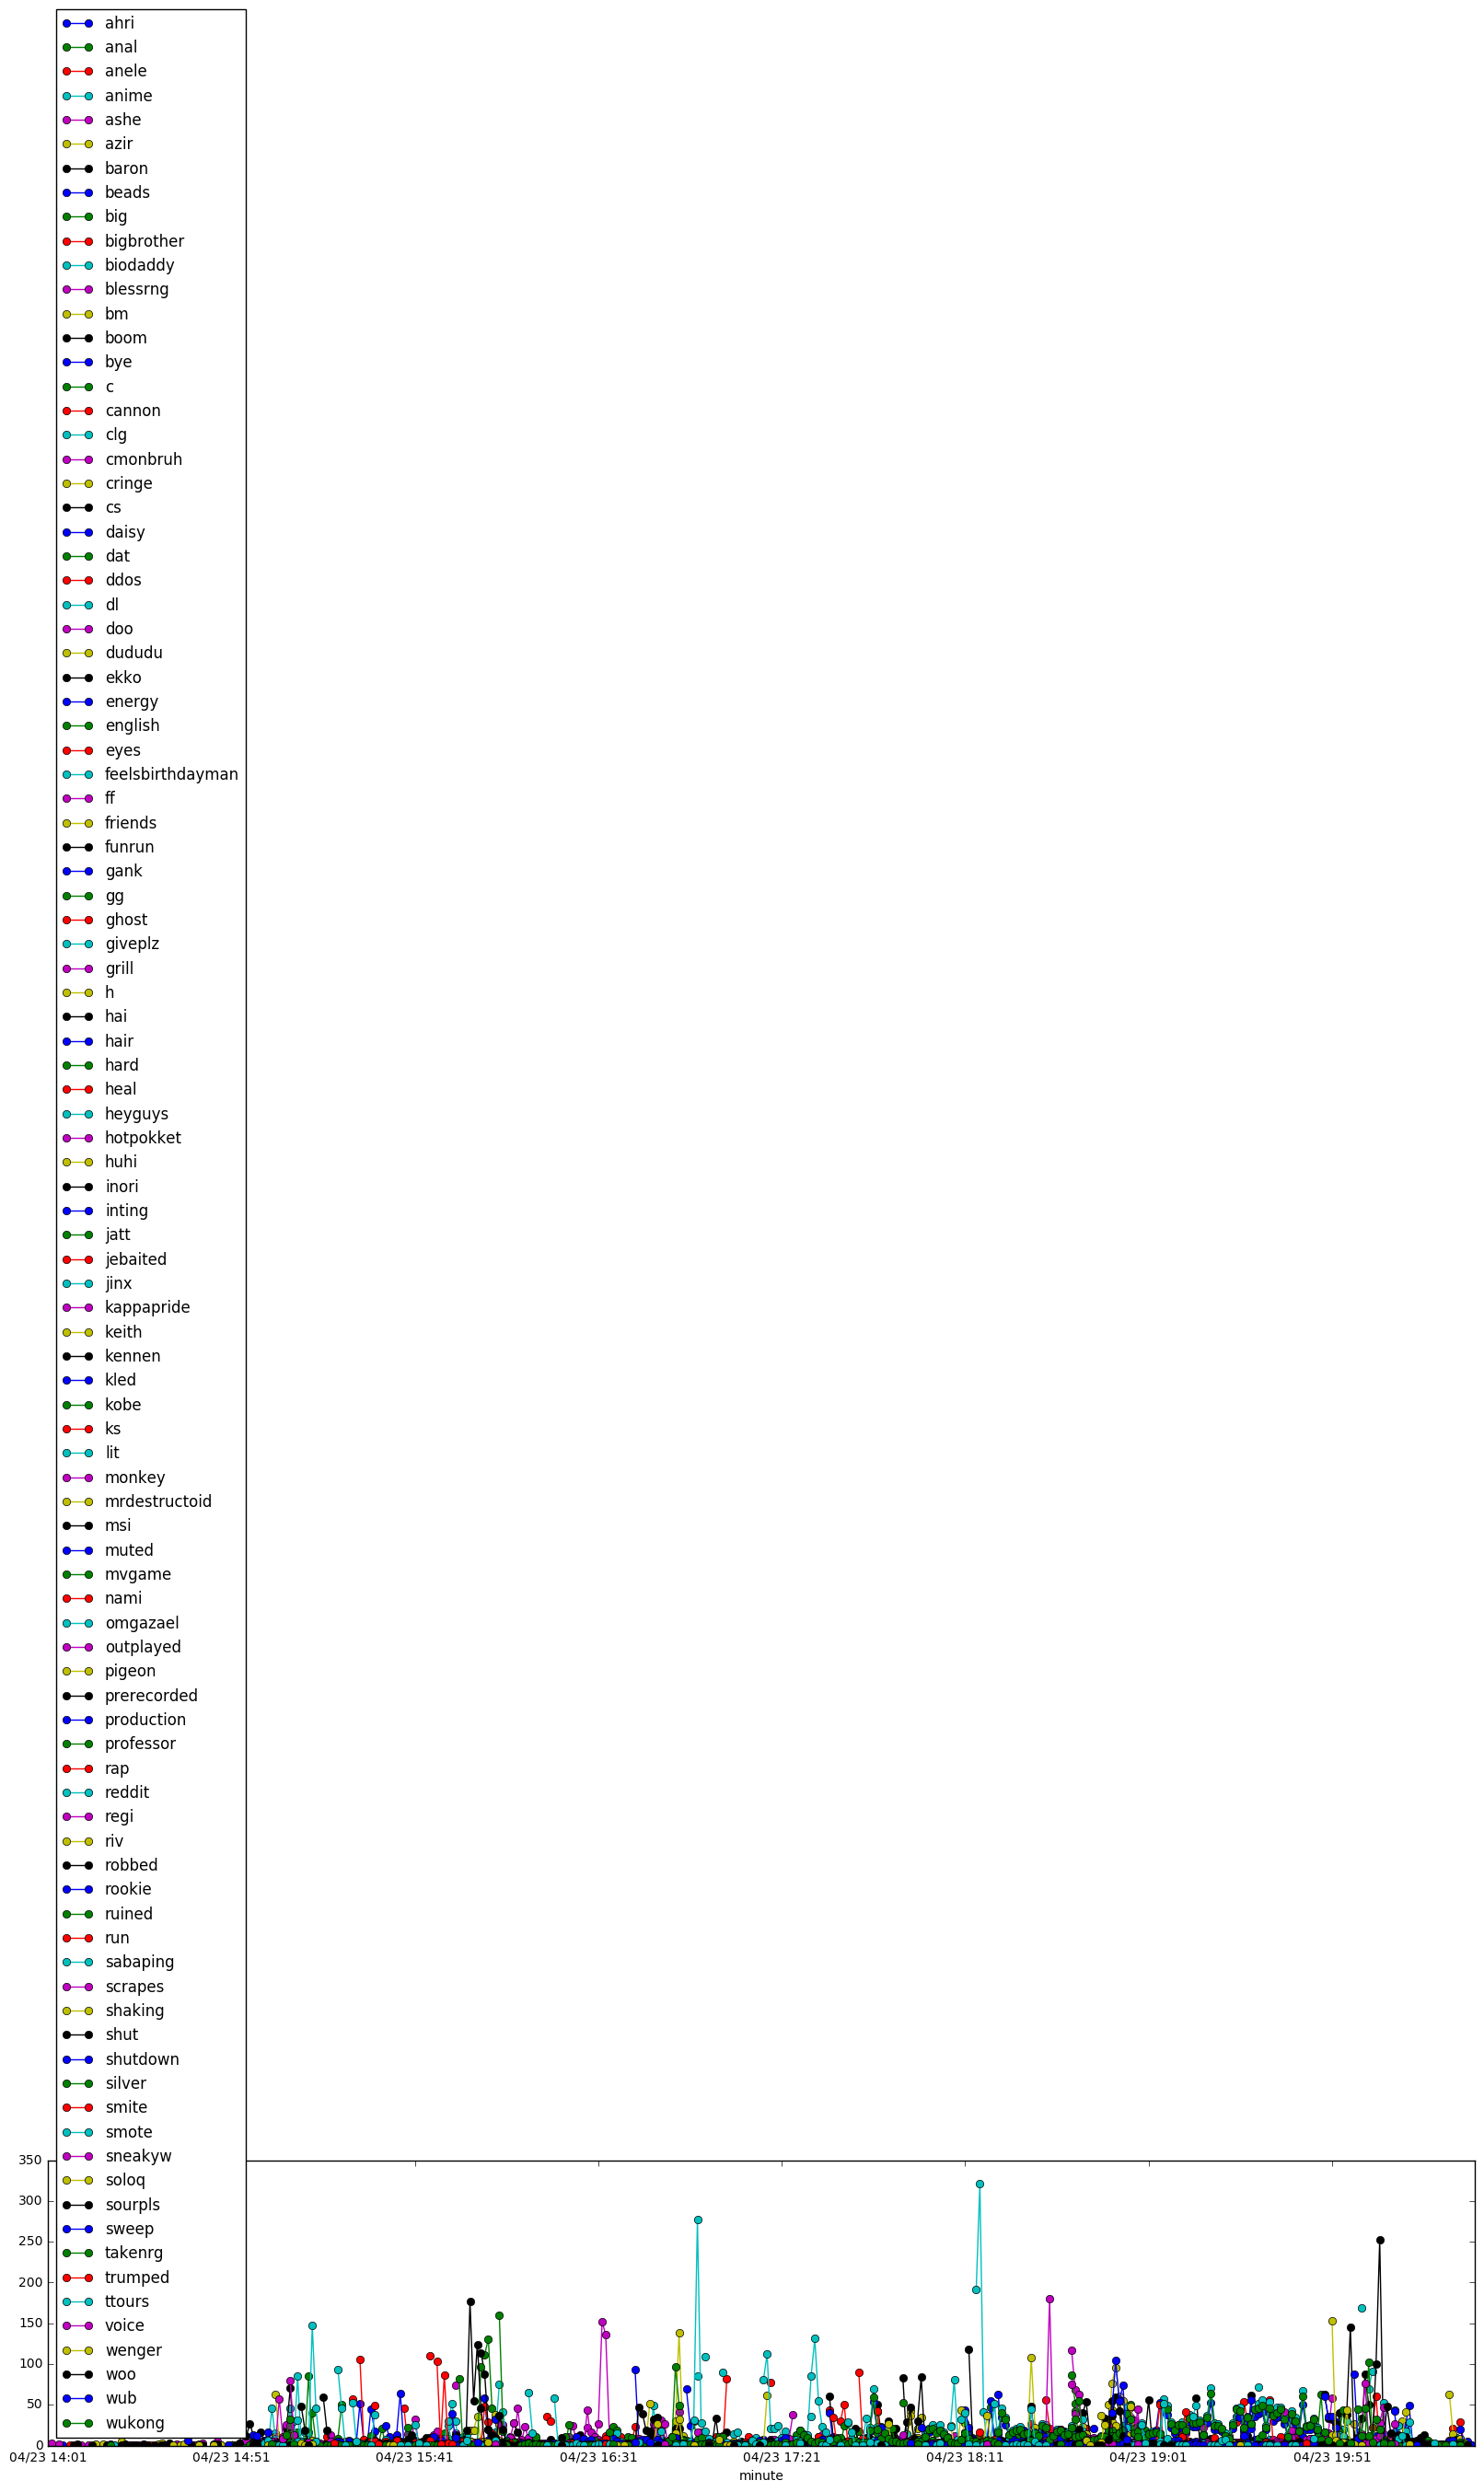

In [13]:
# Produces a wider array of topics to generalize
long = TFIDF.loc[:,(TFIDF > 0).sum() > 10]
long.loc[:,long.max() > 40].plot(figsize=(20,4),legend=True, marker='o')

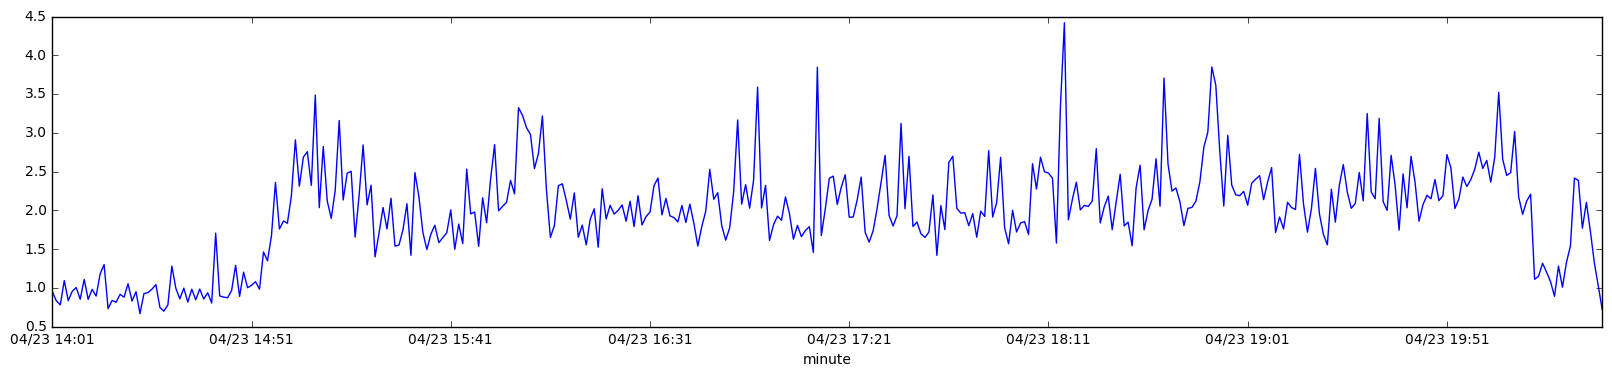

In [14]:
# Generates the boring periods within the timeframe of the stream
TFIDF.mean(axis=1).plot(figsize=(20,4), legend=False)

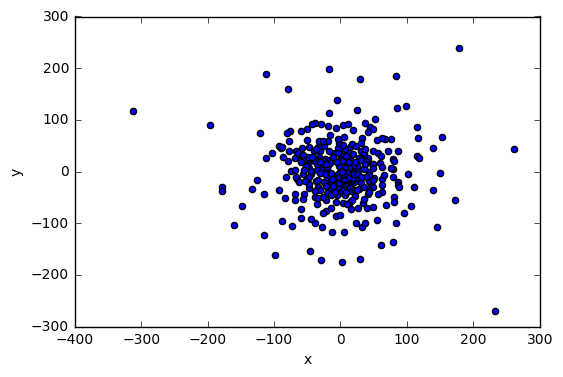

In [15]:
# Unusual time periods during the VOD
TFIDF2 = TFIDF.fillna(0.0)
import sklearn.manifold
mds = sklearn.manifold.MDS(n_components=2, dissimilarity='euclidean', \
                n_init=10, max_iter=1000)
dr = mds.fit_transform(TFIDF2)
dr = pd.DataFrame(dr, columns=['x','y'], index=TFIDF.index)
ax = dr.plot.scatter(x='x', y='y')